# Visualization notebook - all graphs

## Sample Word Cloud - places and names 2018-19

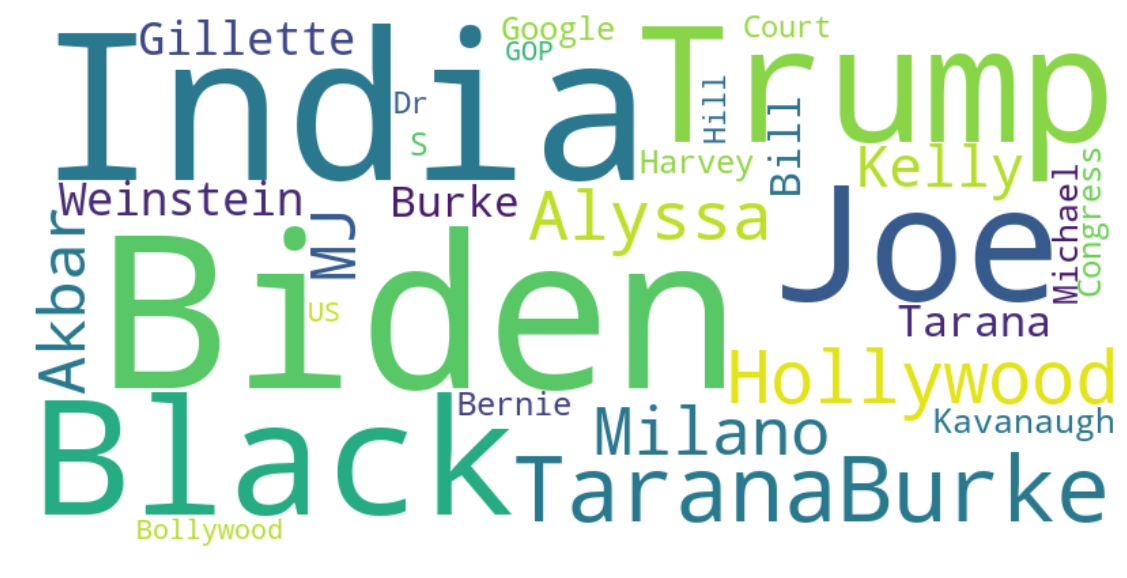

In [1]:
import freq_dict
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
%matplotlib inline
names_18_19 = freq_dict.freq_dict(['datasets/tweet_2018_to_2019_with_hashtags.csv'],noun_type='proper')
wordcloud = WordCloud(width=800, height=400,max_words=30, background_color="white").generate_from_frequencies(dict(names_18_19))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sample bar graph - names and places 2018-19

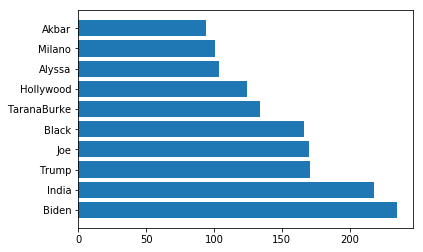

In [2]:
import operator
import collections
sorted_names_18_19 = sorted(dict(names_18_19).items(), key=operator.itemgetter(1),reverse=True)
plt.barh(*zip(*sorted_names_18_19[:10]))
plt.show()

## Time analysis from 2017-2019
### Sample graph shown here, annotations in slides

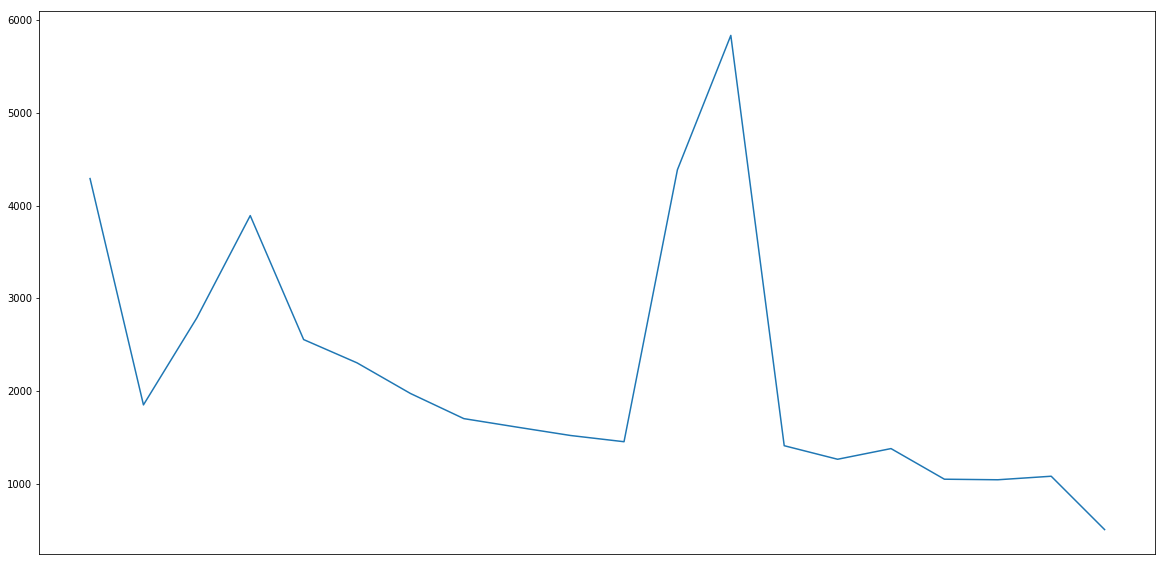

In [3]:
import tweets_over_time
dict_tweet_time = tweets_over_time.tweets_over_time(file_list=['datasets/tweet_2017_to_2018_with_hashtags.csv','datasets/tweet_2018_to_2019_with_hashtags.csv'])
timeframe = [' '.join(item) for item in dict_tweet_time.keys()]
plt.figure(figsize=(20,10))
plt.plot(timeframe,dict_tweet_time.values())
plt.xticks([])
plt.show()

## Geography

### Generate World  and US Basemap GIF

/home/james/UCSD/ECE_143/MeToo/utilities.py:138: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if(plot_us):
/home/james/UCSD/ECE_143/MeToo/utilities.py:140: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection="lcc", lat_1=33, lon_0=-95,
/home/james/UCSD/ECE_143/MeToo/utilities.py:142: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  llcrnrlon=-119, urcrnrlon=-64, resolution='i', area_thresh=10000)


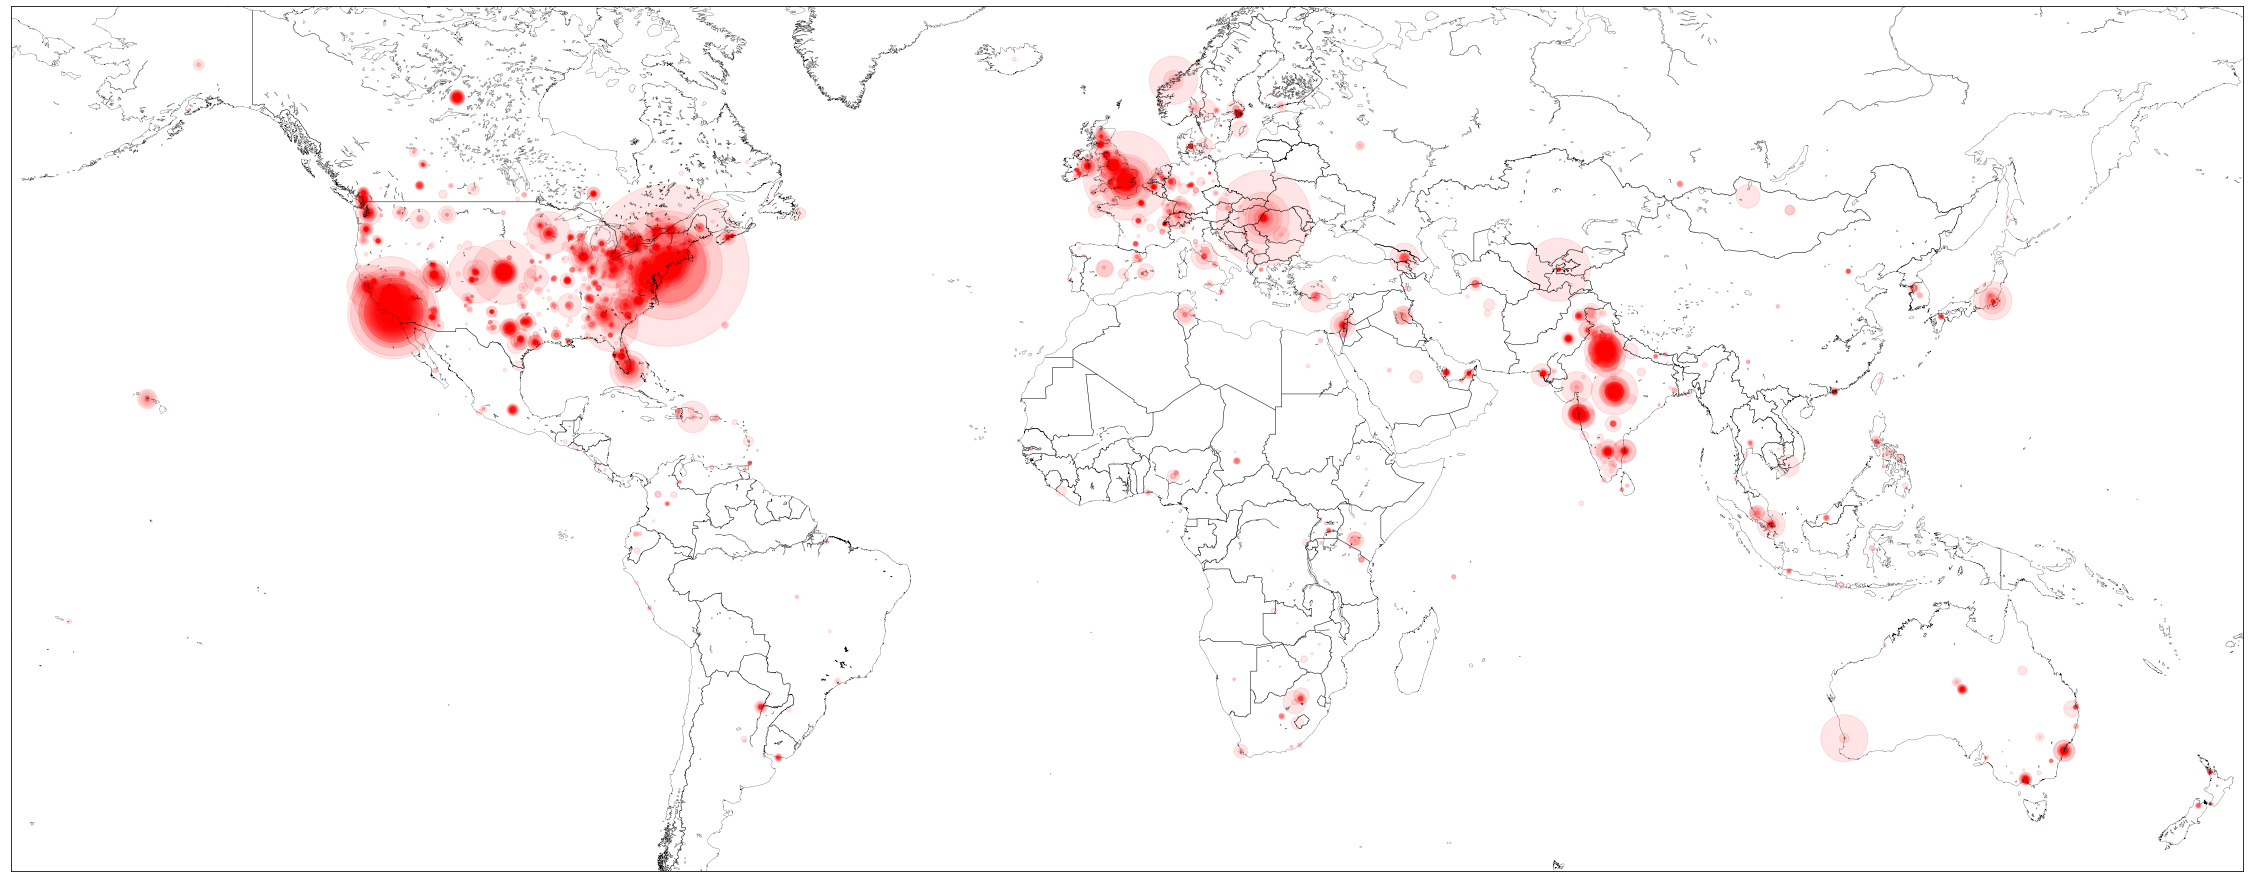

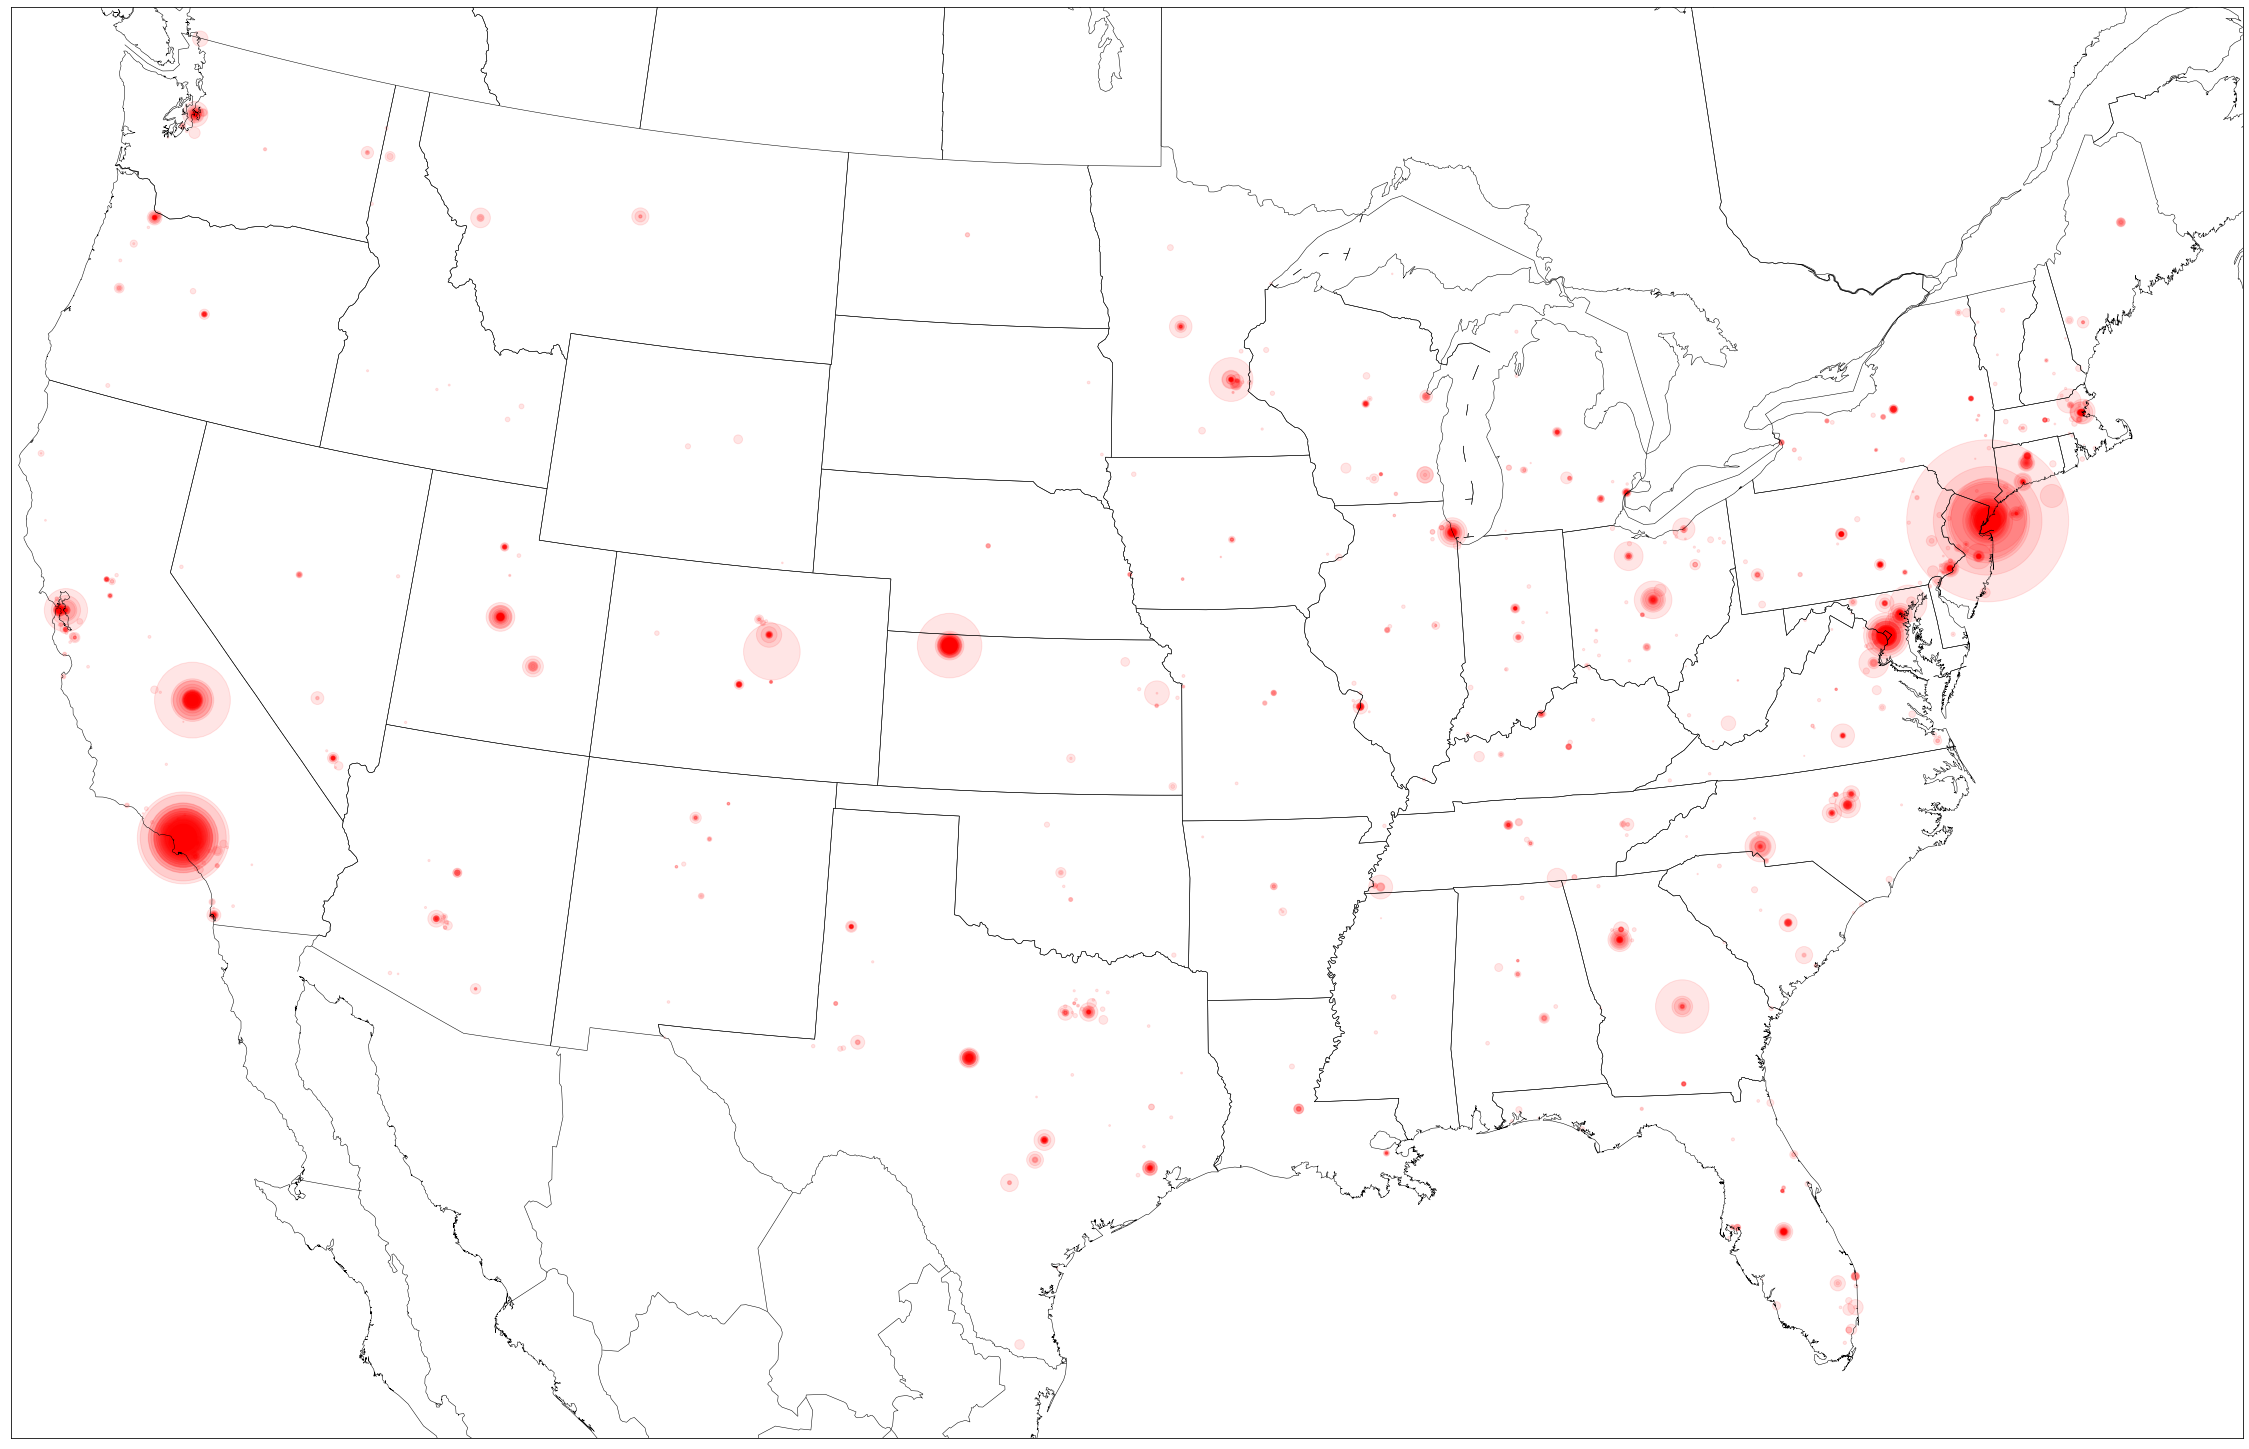

In [7]:
import utilities as ut

# Generate mapping from country to lat/long
countries = ut.create_country_dict()

# Extract country data from lat_long pickled files
lat_longs, us_lat_longs = ut.format_lat_longs(countries)
date_retweets_dict = ut.get_dates_and_retweets()

# Extract retweets for each country
retweets_by_country_dict = ut.get_retweets_by_country(
    lat_longs, date_retweets_dict, countries)

# Plot the geographic map with tweets (Global)
ut.plot_locations(lat_longs, plot_us=False, date_retweets_dict=date_retweets_dict,
               save_every=100, batch_size=100, color_gradient=False)

# Plot the geographic map with tweets (US)
ut.plot_locations(us_lat_longs, plot_us=True, date_retweets_dict=date_retweets_dict,
               save_every=100, batch_size=100, color_gradient=False)

# Generate GIF from images for global map
ut.generate_gif("images/global/")

# Generate GIF from images for US map
ut.generate_gif("images/us/")

### Global GIF Result

![SegmentLocal](images/global/video.gif "Global")


### Global GIF Result

![SegmentLocal](images/us/video.gif "United States")


### Plot Retweets by Country Pie Chart and Bar Graphs

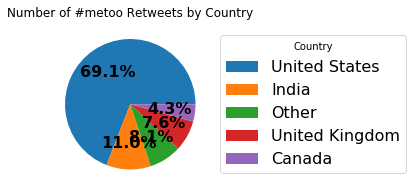

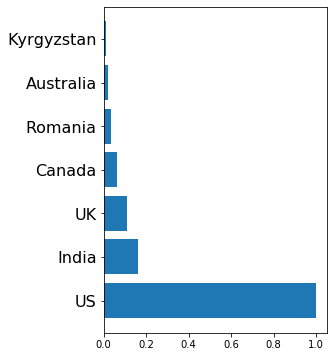

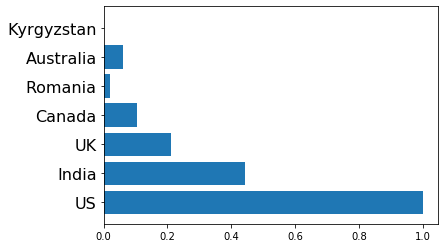

In [8]:
minimal_retweets_by_country = ut.get_minimal_retweets_by_country(retweets_by_country_dict)

ut.generate_retweets_plots(minimal_retweets_by_country)